In [1]:
import sys

print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]


In [3]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [6]:
# The first task that needs to be done here is to load the companies

companies_dict = {
    'Amazon' : 'AMZN',
    'Apple' : 'AAPL',
    'Walgreen' : 'WBA',
    'Northrop Grumman' : 'NOC',
    'Boeing' : 'BA',
    'Lockheed Martin' : 'LMT',
    'McDonalds' : 'MCD' ,
    'Intel': 'INTC' ,
    'Navistar' : 'NAV',
    'IBM' : 'IBM' ,
    'Texas Instruments' : 'TXN',
    'MasterCard': 'MA',
    'Microsoft' : 'MSFT',
    'General Electric' : 'GE',
    'Symantec' : 'SYMC' , 
    'American Express' : 'AXP' ,
    'Pepsi' : 'PEP' , 
    'Coca Cola' : 'KO' ,
    'Johnson & Johnson' : 'JNJ' ,
    'Toyota' : 'TM', 
    'Honda' : 'HMC' ,
    'Mistubishi' : 'MSBHY' ,
    'Sony' : 'SNE' ,
    'Exxon' : 'XOM' ,
    'Chevron' : 'CVX' ,
    'Valero Energy' : 'VLO', 
    'Ford' : 'F' , 
    'bank of America' : 'BAC'
}

companies = sorted(companies_dict.items() , key = lambda x : x[1])


In [23]:
# Using yahoo finance
import fix_yahoo_finance

In [74]:

data_source = 'yahoo'

start_date = '2015-01-01'

end_date = '2017-12-31'

#Use pandas reader


In [76]:

pandas_data = data.DataReader(list(companies_dict.values()), data_source, start_date,
                              end_date).unstack(level = 0)

In [77]:
panel_data = pandas_data


In [108]:
stock_close = panel_data.loc['Open']
stock_open = panel_data.loc['Close']

1


## 

1


2

In [109]:
stock_close

Symbols  Date      
AAPL     2014-12-31    112.820000
         2015-01-02    111.389999
         2015-01-05    108.290001
         2015-01-06    106.540001
         2015-01-07    107.199997
         2015-01-08    109.230003
         2015-01-09    112.669998
         2015-01-12    112.599998
         2015-01-13    111.430000
         2015-01-14    109.040001
         2015-01-15    110.000000
         2015-01-16    107.029999
         2015-01-20    107.839996
         2015-01-21    108.949997
         2015-01-22    110.260002
         2015-01-23    112.300003
         2015-01-26    113.739998
         2015-01-27    112.419998
         2015-01-28    117.629997
         2015-01-29    116.320000
         2015-01-30    118.400002
         2015-02-02    118.050003
         2015-02-03    118.500000
         2015-02-04    118.500000
         2015-02-05    120.019997
         2015-02-06    120.019997
         2015-02-09    118.550003
         2015-02-10    120.169998
         2015-02-11    122.7

In [110]:
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

In [114]:
row= stock_close.shape

In [115]:
row

(21168,)

In [117]:
stock_close

array([112.81999969, 111.38999939, 108.29000092, ...,  83.98999786,
        83.98000336,  84.        ])

In [118]:

stock_open

array([110.37999725, 109.33000183, 106.25      , ...,  83.90000153,
        84.01999664,  83.63999939])

In [119]:
movements = stock_close - stock_open


In [120]:
movements

array([ 2.44000244,  2.05999756,  2.04000092, ...,  0.08999634,
       -0.03999329,  0.36000061])

Text(0.5,1,"('Amazon', 'AMZN')")

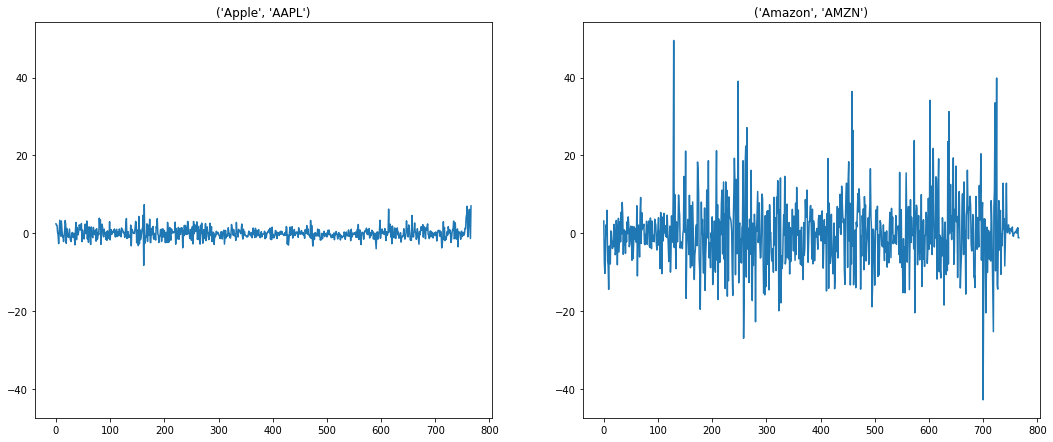

In [123]:
plt.clf

plt.figure(figsize = (18 , 16))

ax1 = plt.subplot(221)
plt.plot(movements[0:767])
plt.title(companies[0])

plt.subplot(222, sharey = ax1)

plt.plot(movements[768:2 * 768 - 1])
plt.title(companies[1])

In [157]:


movement = []
i = 0
condition = True
while(condition == True) :
    news = []
    
    for j in range(i , i + 756):
        news.append(movements[j])
        
    movement.append(news)
    i = i + 756
    if(i >= 21168) :
        break


In [158]:
move = np.array(movement)


In [159]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(move)
print(new.max())
print(new.min())
print(new.mean())

0.259844372052625
-0.26029795916062815
-0.00103525056891158


Text(0.5,1,"('Amazon', 'AMZN')")

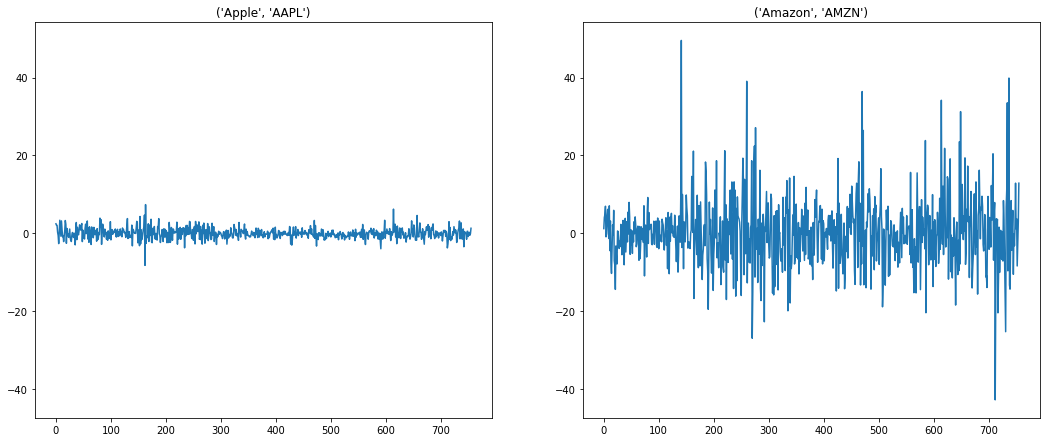

In [160]:
plt.clf

plt.figure(figsize = (18 , 16))

ax1 = plt.subplot(221)
plt.plot(move[0][:])
plt.title(companies[0])

plt.subplot(222, sharey = ax1)

plt.plot(move[1][:])
plt.title(companies[1])

Text(0.5,1,"('Amazon', 'AMZN')")

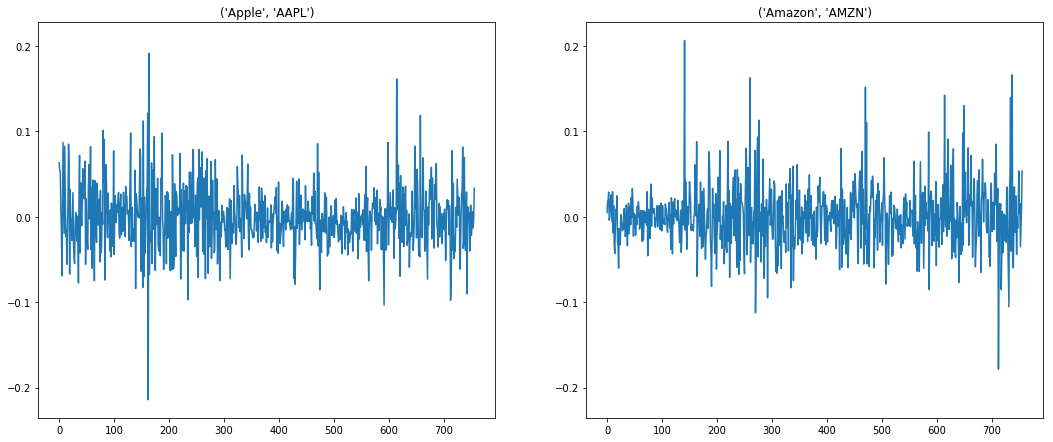

In [161]:
plt.clf

plt.figure(figsize = (18 , 16))

ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey = ax1)

plt.plot(new[1][:])
plt.title(companies[1])

In [162]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
normalizer = Normalizer()

# Kmeans model with 10 clusters

kmeans = KMeans(n_clusters = 10, max_iter = 1000)

pipeline = make_pipeline(normalizer , kmeans)

In [163]:
pipeline.fit(move)

print(kmeans.inertia_)

9.832371034972216


In [164]:
print(move.shape)


(28, 756)


In [165]:
print(len(companies))

28


In [167]:
import pandas as pd

labels = pipeline.predict(move)

df = pd.DataFrame({'labels' : labels, 'Companies' : companies})

print(df.sort_values('labels'))

    labels                 Companies
7        0    (General Electric, GE)
24       1  (Texas Instruments, TXN)
10       1             (Intel, INTC)
9        1                (IBM, IBM)
8        2              (Honda, HMC)
6        2                 (Ford, F)
18       2           (Navistar, NAV)
4        2    (bank of America, BAC)
2        2   (American Express, AXP)
23       2              (Toyota, TM)
19       3   (Northrop Grumman, NOC)
3        3              (Boeing, BA)
13       3    (Lockheed Martin, LMT)
11       4  (Johnson & Johnson, JNJ)
12       4           (Coca Cola, KO)
26       4           (Walgreen, WBA)
20       4              (Pepsi, PEP)
27       5              (Exxon, XOM)
5        5            (Chevron, CVX)
16       6       (Mistubishi, MSBHY)
21       6               (Sony, SNE)
25       7      (Valero Energy, VLO)
14       8          (MasterCard, MA)
22       8          (Symantec, SYMC)
1        8            (Amazon, AMZN)
17       8         (Microsoft, MSFT)
0